# Los Angeles and San Diego Counties Housing Market Analysis
Within the past 5 years (between Jan 2015 - Dec 2019)
1. Do houses in Los Angeles County stay longer on the market than SD County?
    - H0 = Time on Market (LA) is the same as Time on Market (SD)
1. Do houses on the market for longer period sold for lower prices within Los Angeles County? And within SD County?
    - H0 = Price Cut Ratio is different between long Time on Market (60) vs short Time on Market
    
**Price  Ratios (Closing Price lower than Listing Price)**
$$\text{PriceRatio} = \frac{ClosePrice}{ListPrice}$$

**Price Cut Ratios (Closing Price lower than Listing Price)**
$$\text{PriceDiffRatio} = \frac{(ClosePrice-ListPrice)}{ListPrice}$$

**On Market Days (The number of days between 'OnMarketDate' and 'CloseDate'**


### California Regional Multiple Listing Services (CRMLS)
Real Estate Market Analysis using houses (single family homes and townhouses) sold between January 2015 and December 2019 in the Los Angeles Counties and San Diego Counties from the CRMLS.

### Loading and Preprocessing
Import relevant libraries and scripts; Set figure styles.

In [1]:
import os
import csv
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt
import seaborn as sns
import scipy 

from codes.data_cleaning import compile_csv, data_preprocessing, CLT_bootstrap
from codes.stat_testing import chi2_contingency, welch_test
from codes.sns_fig_gen import distplot, barplot, boxplot, violinplot, scatterplot

%matplotlib inline
sns.set(style="darkgrid")
rc = {
    'grid.color': '.8',
    'grid.linestyle': '--',
    }
sns.set(rc=rc)
titles = {'OnMarketDays':'Time on Market (Days)', 
              'ClosePrice':'Close Price ($ millions)', 
              'ListPrice':'List Price ($ millions)',
              'PriceDiffRatio':'Price Cut Ratio'}
columns = ['OnMarketDays','PriceDiffRatio']
proj_path = os.getcwd() # assumes in the top-most project folder
data_path = os.path.join(proj_path, 'data')

Run the below cell to create a "cleaned_data.csv"

In [2]:
# from codes.data_cleaning import compile_csv, data_preprocessing

# mls_df = compile_csv()
# mls_df = data_preprocessing(mls_df)
# mls_df.drop(['Matrix_Unique_ID'],axis=1)
# mls_df.to_csv(os.path.join(data_path,'cleaned_data.csv'),sep=',',
#                   quoting=csv.QUOTE_MINIMAL, header=mls_df.columns, index=False)

#### Load the "cleaned_data.csv"

In [3]:
df_path = os.path.join(data_path,'cleaned_data.csv')
mls_df = pd.read_csv(df_path, header=0, low_memory=False)
# mls_df.info()
# display(mls_df.head())
# display(mls_df.tail())

Scaling the data for easier readability.

In [4]:
mls_df.ClosePrice = mls_df.ClosePrice/1e6
mls_df.ListPrice = mls_df.ListPrice/1e6
mls_df.PriceDifference = mls_df.PriceDifference/1e6

**Seperating into individual DataFrame for LA and SD**

In [5]:
LA = mls_df[mls_df.CountyOrParish == 'Los Angeles']
SD = mls_df[mls_df.CountyOrParish == 'San Diego']
LA_LongOnMarket = LA[LA.SixtyDays == '> 60 days']
SD_LongOnMarket = SD[SD.SixtyDays == '> 60 days']
LA_ShortOnMarket = LA[LA.SixtyDays == '< 60 days']
SD_ShortOnMarket = SD[SD.SixtyDays == '< 60 days']

Central Limit Theorem (Sample Means from Bootstrapping 1000 samples 200 times) to obtain Population Means and use normal distribution to test the hypothesis of mean differences.

In [6]:
LA_means = CLT_bootstrap(LA)
SD_means = CLT_bootstrap(SD)
LA_LoM_means = CLT_bootstrap(LA_LongOnMarket)
SD_LoM_means = CLT_bootstrap(SD_LongOnMarket)
LA_SoM_means = CLT_bootstrap(LA_ShortOnMarket)
SD_SoM_means = CLT_bootstrap(SD_ShortOnMarket)

### Descriptive Summary
251,131 houses from LA County and 128,343 houses from SD County sold between Jan 2015 to Dec 2019.

**LA County:**
<p>TimeOnMarket > 60 = 128,858 houses</p>
<p>TimeOnMarket < 60 = 122,273 houses</p>
    
**SD County:**
<p>TimeOnMarket > 60 = 58,970 houses</p>
<p>TimeOnMarket > 60 = 69,373 houses</p>
  

#### Chi-Square Test

In [7]:
chi2_contingency(LA_LongOnMarket,LA_ShortOnMarket, SD_LongOnMarket,SD_ShortOnMarket)

X^2(1)=967.0403388313596: p=2.621973866170481e-212


With Chi-Square test p < 0.05, there is relationship between Counties and the Time on the Market, as expected.

### Descriptive Summary Figures

Houses sold  Means and Box Plots

#### LA vs SD County

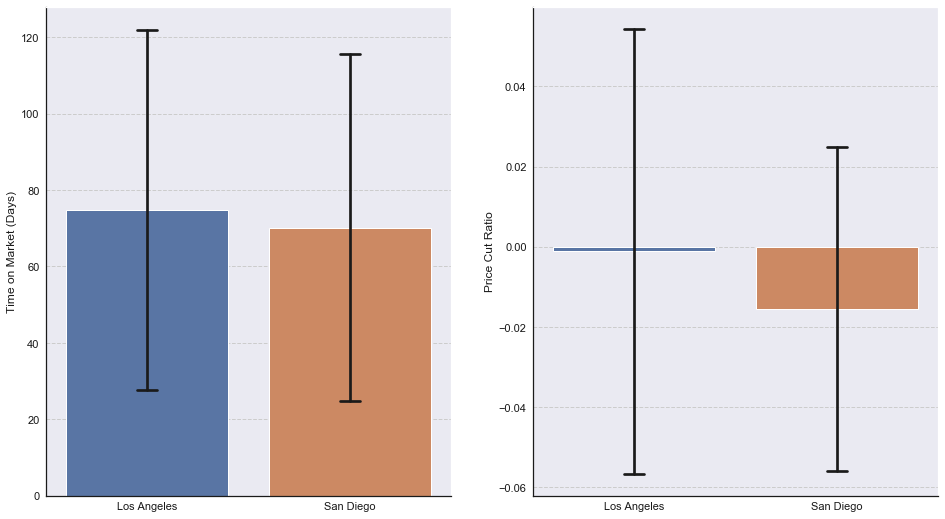

In [8]:
barplot(x='CountyOrParish', y=columns, data=mls_df, title=f'Population');

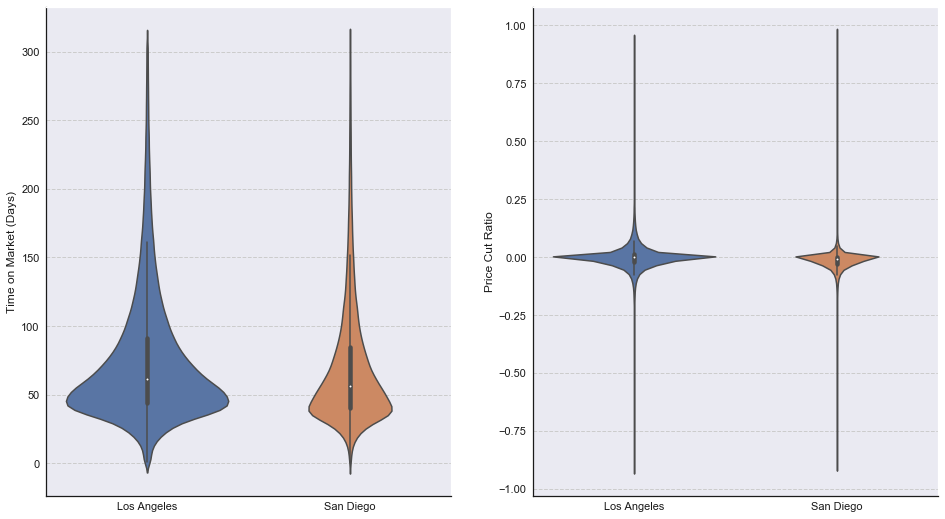

In [9]:
violinplot(x='CountyOrParish', y=columns, data=mls_df, title=f'Population');

### LA's On Market Analysis

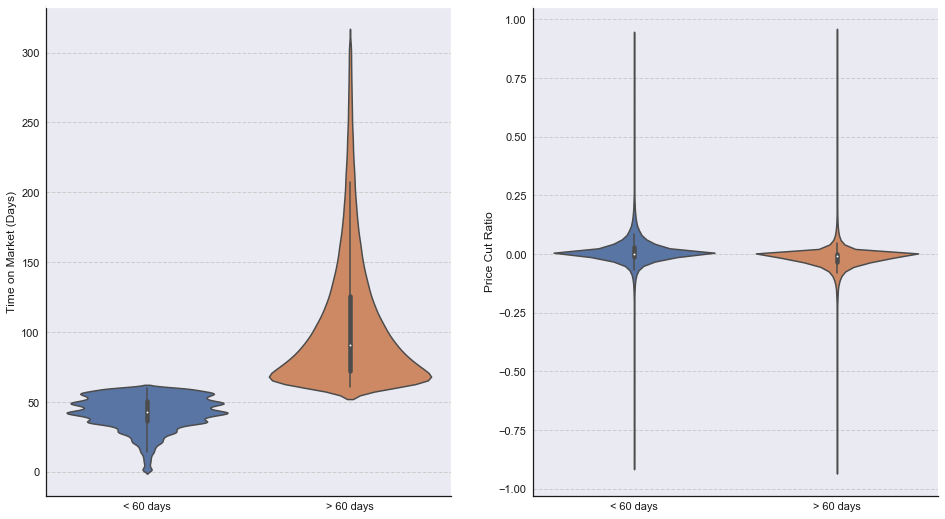

In [10]:
violinplot(x='SixtyDays', y=columns, order=['< 60 days','> 60 days'], data=LA);

### SD's On Market Analysis

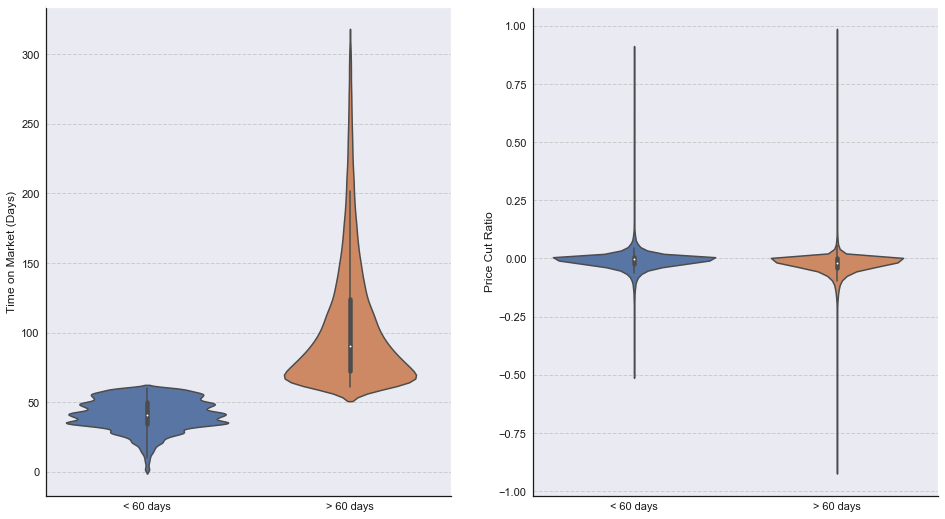

In [11]:
violinplot(x='SixtyDays', y=columns, order=['< 60 days','> 60 days'], data=SD);

Sample Means Distribution Plots

0.3043315364619671


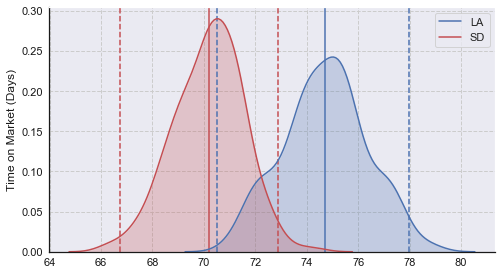

283.92004707159606


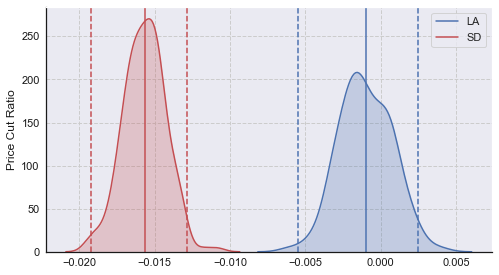

In [12]:
for col in columns:
    distplot(LA_means[col],SD_means[col], 'LA','SD', 
         (LA_means[col].mean(), LA_means[col].std(ddof=1)),
         (SD_means[col].mean(), SD_means[col].std(ddof=1)),
         bins=None, kde=True, title=titles[col])

1.1452562111134859


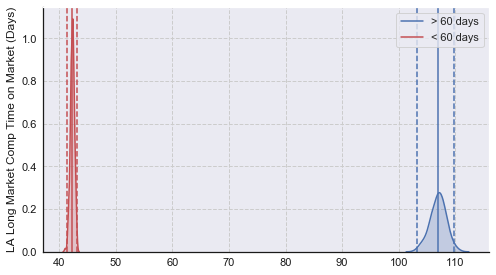

236.7390786474414


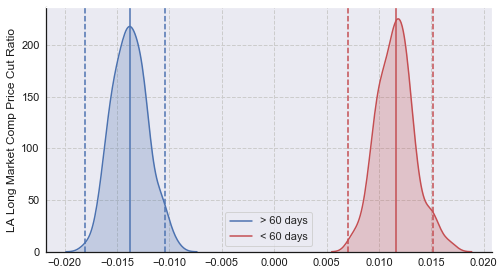

In [13]:
for col in columns:
    distplot(LA_LoM_means[col],LA_SoM_means[col], '> 60 days','< 60 days', 
         (LA_LoM_means[col].mean(), LA_LoM_means[col].std(ddof=1)),
         (LA_SoM_means[col].mean(), LA_SoM_means[col].std(ddof=1)),
         bins=None, kde=True, title=f'LA Long Market Comp {titles[col]}')

0.9604593663136374


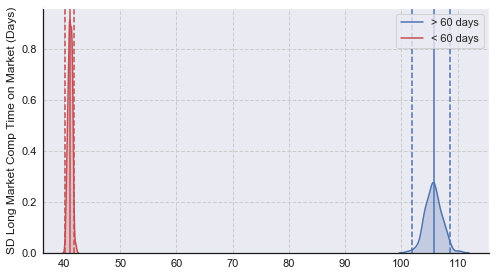

311.4158194518211


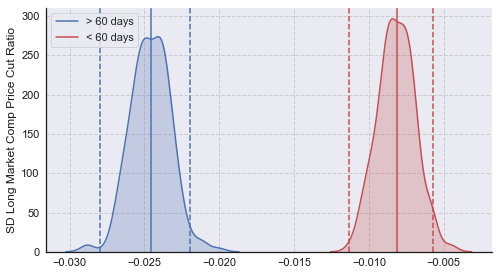

In [14]:
for col in columns:
    distplot(SD_LoM_means[col],SD_SoM_means[col], '> 60 days','< 60 days', 
         (SD_LoM_means[col].mean(), SD_LoM_means[col].std(ddof=1)),
         (SD_SoM_means[col].mean(), SD_SoM_means[col].std(ddof=1)),
         bins=None, kde=True, title=f'SD Long Market Comp {titles[col]}')

### A Look at sales as sampled weekly
Using Central Limit Theorem to test the means of weekly sales in LA and SD.

In [15]:
mls_months = mls_df.groupby(['CountyOrParish','CloseYearWeek']).agg('mean').reset_index()
display(mls_months.head())
display(mls_months.tail())

,CountyOrParish,CloseYearWeek,ListPrice,Matrix_Unique_ID,ClosePrice,OnMarketDays,PriceDifference,PriceRatio,PriceDiffRatio
0,Los Angeles,2015 - 01,0.627929,8.422468e+07,0.613969,78.417178,-0.013959,0.982580,-0.017420
1,Los Angeles,2015 - 02,0.658992,8.325117e+07,0.652521,83.362556,-0.006472,0.989153,-0.010847
2,Los Angeles,2015 - 03,0.641129,8.222451e+07,0.628646,86.458432,-0.012483,0.987827,-0.012173
3,Los Angeles,2015 - 04,0.633147,8.227648e+07,0.622503,87.418985,-0.010645,0.983103,-0.016897
4,Los Angeles,2015 - 05,0.648808,8.226730e+07,0.635939,84.188847,-0.012869,0.987895,-0.012105


,CountyOrParish,CloseYearWeek,ListPrice,Matrix_Unique_ID,ClosePrice,OnMarketDays,PriceDifference,PriceRatio,PriceDiffRatio
521,San Diego,2019 - 49,0.812651,3.218337e+08,0.797967,73.008000,-0.014684,0.986511,-0.013489
522,San Diego,2019 - 50,0.816792,3.221384e+08,0.802391,74.221719,-0.014401,0.987865,-0.012135
523,San Diego,2019 - 51,0.770276,3.229165e+08,0.755256,71.991579,-0.015021,0.986203,-0.013797
524,San Diego,2019 - 52,0.719866,3.233831e+08,0.708326,70.089347,-0.011539,0.987111,-0.012889
525,San Diego,2019 - 53,0.789217,3.235054e+08,0.776653,72.660256,-0.012564,0.988825,-0.011175


In [16]:
import matplotlib.pyplot as plt

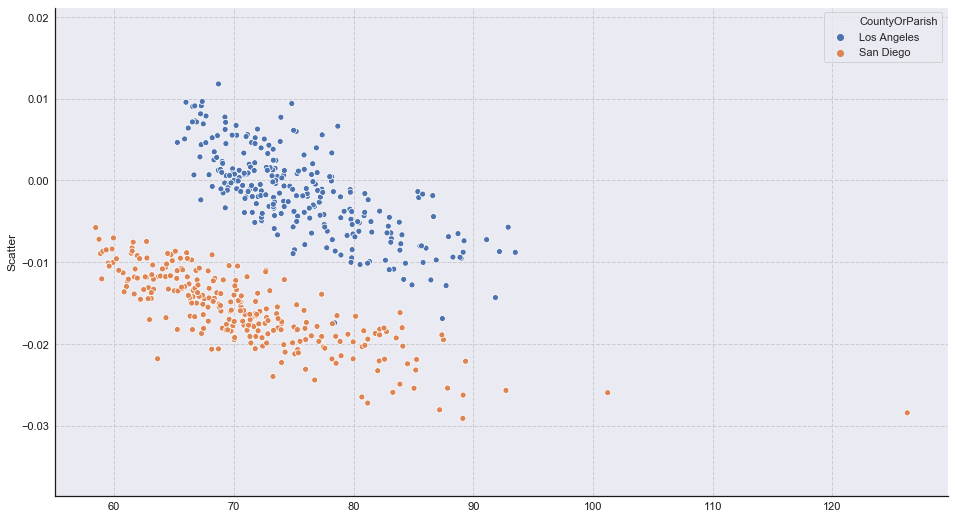

(<Figure size 1152x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12ed2a710>)

In [17]:
scatterplot(x='OnMarketDays',y='PriceDiffRatio',hue='CountyOrParish',data=mls_months, title='Scatter')

## Welch's T-Test
Using the sample means distribution.

### Housing Market in LA vs SD County Means Comparison:

In [18]:
welch_test(LA_means, SD_means, columns)

OnMarketDays: p=3.956283569348807e-104; Null-hypothesis rejected.
PriceDiffRatio: p=1.0946060765103335e-262; Null-hypothesis rejected.


### LA County Housing Market :
Comparison of means on whether a house on market longer suffers price cut.

In [19]:
welch_test(LA_LoM_means.PriceDiffRatio, LA_SoM_means.PriceDiffRatio)

p=0.0; Null-hypothesis rejected.


### SD County Housing Market :
Comparison of means on whether a house on market longer suffers price cut.

In [20]:
welch_test(SD_LoM_means.PriceDiffRatio, SD_SoM_means.PriceDiffRatio) 

p=0.0; Null-hypothesis rejected.
